In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor #Random Forest Regressor
from sklearn.ensemble import BaggingRegressor #Bagging Regressor
from sklearn.neighbors import KNeighborsRegressor #KNN Regressor
from sklearn.linear_model import LinearRegression #Linear Regressor

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("googleplaystore.csv")

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.shape

(10841, 13)

In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
df = df.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'])

checking missing value

In [10]:
df.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [11]:
df[df['Rating'] > 5]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [12]:
df['Category'].unique().tolist()

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [13]:

# drop category of above 5 because there is only one column

In [14]:
document = df[df['Category'] == '1.9'].index
df = df.drop(document)

In [15]:
train_df = df.copy()

In [16]:
#look for price column
train_df['Price'] = train_df['Price'].apply(lambda x : x.strip('$'))
#look for install column
train_df['Installs'] = train_df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

converting these category to float

In [17]:

train_df['Price'] = train_df['Price'].astype(float)
train_df['Installs'] = train_df['Installs'].astype(float)
train_df['Reviews'] = train_df['Reviews'].astype(float)



In [18]:
## reomve category of type nan
document = train_df[train_df['Type'].isnull()].index
train_df = train_df.drop(document)



In [19]:
##taking features with type object
lists = [c for c in train_df.columns if train_df[c].dtype == 'object']
lists

['Category', 'Size', 'Type', 'Content Rating', 'Genres']

In [20]:
# Encode features except Size
for c in lists:
    if c != 'Size':
        train_df[c] = train_df[c].astype('category')
        train_df[c] = train_df[c].cat.codes

In [21]:
# Compare actual and encoded labels for column 'Type'
print(df['Type'].unique().tolist())
print(train_df['Type'].unique().tolist(), '\n')

['Free', 'Paid', nan]
[0, 1] 



In [25]:
# Replace "Varies with device" in Size with null value
train_df.loc[train_df['Size'] == 'Varies with device', 'Size'] = np.nan

In [27]:
# Removing the suffixes (k and M) and representing all the data as bytes 
# (i.e)for k, value is multiplied by 1000 and for M, the value is multiplied by 1000000 
train_df.Size = (train_df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             train_df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [28]:
##again check for null values


# Now check null values
train_df.isnull().sum()



Category             0
Rating            1473
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [31]:
##there is huge rating of size and rating missing values so i will not use mean value to fill rather
## I will use linear regression
# For Size missing values
# Get rows which are not null for Size
X = train_df[train_df['Size'].notnull()]
y = train_df.loc[train_df['Size'].notnull(), 'Size']
X = X.drop(columns=['Size', 'Rating'])
model = linear_model.LinearRegression()
model.fit(X, y)
X_miss = train_df[train_df['Size'].isnull()]
X_miss = X_miss.drop(columns = ['Size','Rating'])

# Fill the predicted values
train_df.loc[train_df['Size'].isnull(), 'Size'] = model.predict(X_miss)


In [32]:
train_df.isnull().sum()

Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [33]:
# Final data type of the data
train_df.dtypes

Category             int8
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type                 int8
Price             float64
Content Rating       int8
Genres               int8
dtype: object

In [34]:
#check  the preprocessed data
train_df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159.0,19000000.0,10000.0,0,0.0,1,9
1,0,3.9,967.0,14000000.0,500000.0,0,0.0,1,12
2,0,4.7,87510.0,8700000.0,5000000.0,0,0.0,1,9
3,0,4.5,215644.0,25000000.0,50000000.0,0,0.0,4,9
4,0,4.3,967.0,2800000.0,100000.0,0,0.0,1,11


# Data Visualizations

<AxesSubplot:>

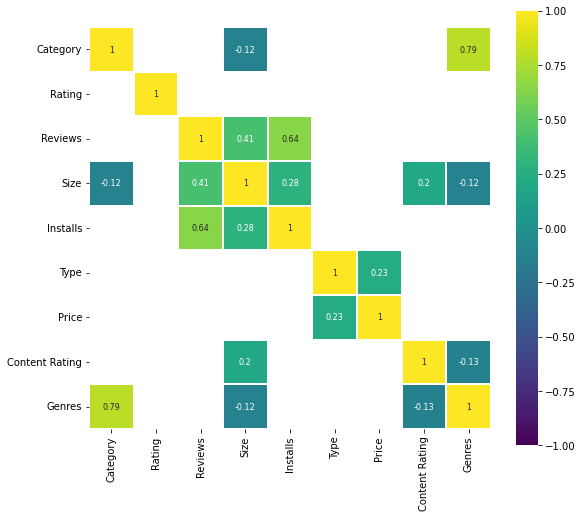

In [35]:
# Correlation heatmap
corr = train_df.corr() 
plt.figure(figsize=(9, 8))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

Text(0.5, 1.0, 'Distribution of Rating')

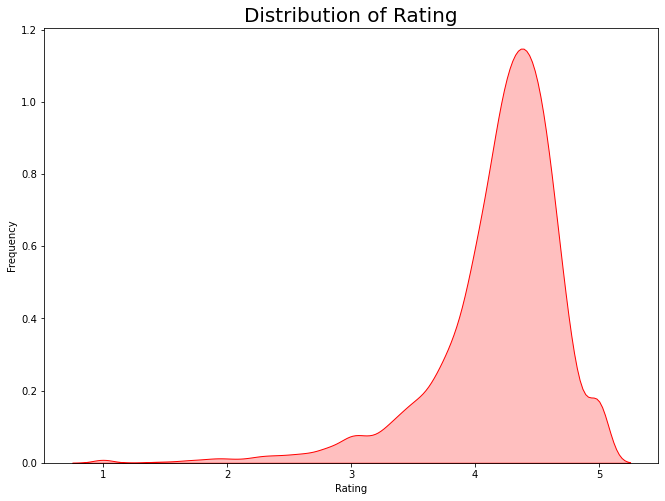

In [37]:
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

# rating distibution 
rcParams['figure.figsize'] = 11,8
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

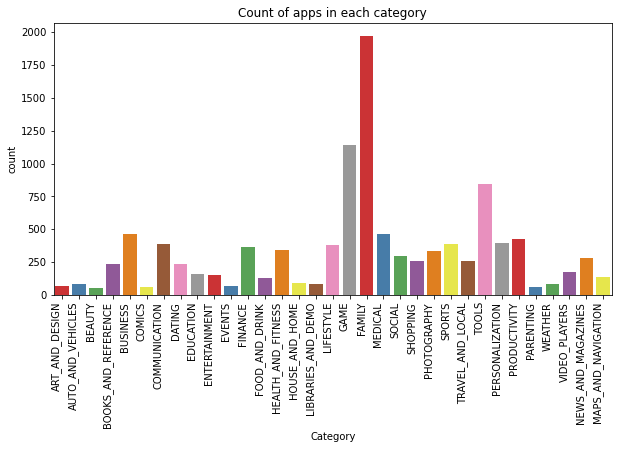

In [44]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x="Category", data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of apps in each category')
plt.show() 

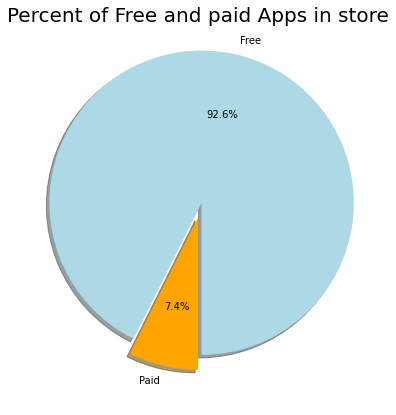

In [45]:
# about 94% of the apps are free on google playstore
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["lightblue","orange"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free and paid Apps in store',size = 20)
plt.show()

# training the model

In [48]:
cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Rating']

# Pick remaining columns and standardize them 
columns = [c for c in train_df.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_df[columns])
train_df[columns] = scaler.transform(train_df[columns])

# Check data after standarization
train_df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,-0.151664,-0.140860,-0.181770,0,-0.064419,1,9
1,0,3.9,-0.151388,-0.366005,-0.176007,0,-0.064419,1,12
2,0,4.7,-0.121828,-0.604659,-0.123084,0,-0.064419,1,9
3,0,4.5,-0.078063,0.129314,0.406145,0,-0.064419,4,9
4,0,4.3,-0.151388,-0.870330,-0.180712,0,-0.064419,1,11


In [57]:
##Train Test Split
y = train_df['Rating']
X = train_df.drop(columns=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set :", X_train.shape)
print("Validation Set:", X_test.shape)

Training Set Dimensions: (8671, 8)
Validation Set Dimensions: (2168, 8)


# Random Forest Technique

In [59]:

randomf = RandomForestRegressor(n_estimators=300)


In [60]:
randomf

RandomForestRegressor(n_estimators=300)

In [64]:
mask = ~np.isnan(y_train)
X_train = X_train[mask]
y_train = y_train[mask]

In [69]:
test_mask = ~X_test.isna().any(axis=1) & ~y_test.isna()
X_test = X_test[test_mask]
y_test = y_test[test_mask]

In [72]:
randomf.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, randomf.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, randomf.predict(X_test)))

Mean squared Error for Training Set: 0.030736586559451055
Mean squared Error for Test Set: 0.23614393927275093


feature: Category = 0.10152089088429969
feature: Reviews = 0.3494302446382712
feature: Size = 0.28085474447952097
feature: Installs = 0.10803779372256435
feature: Type = 0.004537941449381156
feature: Price = 0.020592112907408533
feature: Content Rating = 0.026220567047723825
feature: Genres = 0.10880570487083024


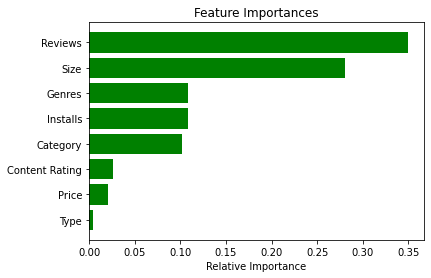

In [73]:
# Important features for random forest regressor
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
    
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(6, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
## rating of free apps is more than paid apps
